Saving 4. Predict Heart Disease.csv to 4. Predict Heart Disease (2).csv
✅ Dataset loaded successfully!
Shape of the dataset: (303, 14)

First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   0       145   233    1        2      150      0      2.3      2   
1   67    1   3       160   286    0        2      108      1      1.5      1   
2   67    1   3       120   229    0        2      129      1      2.6      1   
3   37    1   2       130   250    0        0      187      0      3.5      2   
4   41    0   1       130   204    0        2      172      0      1.4      0   

   ca  thal  target  
0   0     2       0  
1   3     1       1  
2   2     3       1  
3   0     1       0  
4   0     1       0  


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


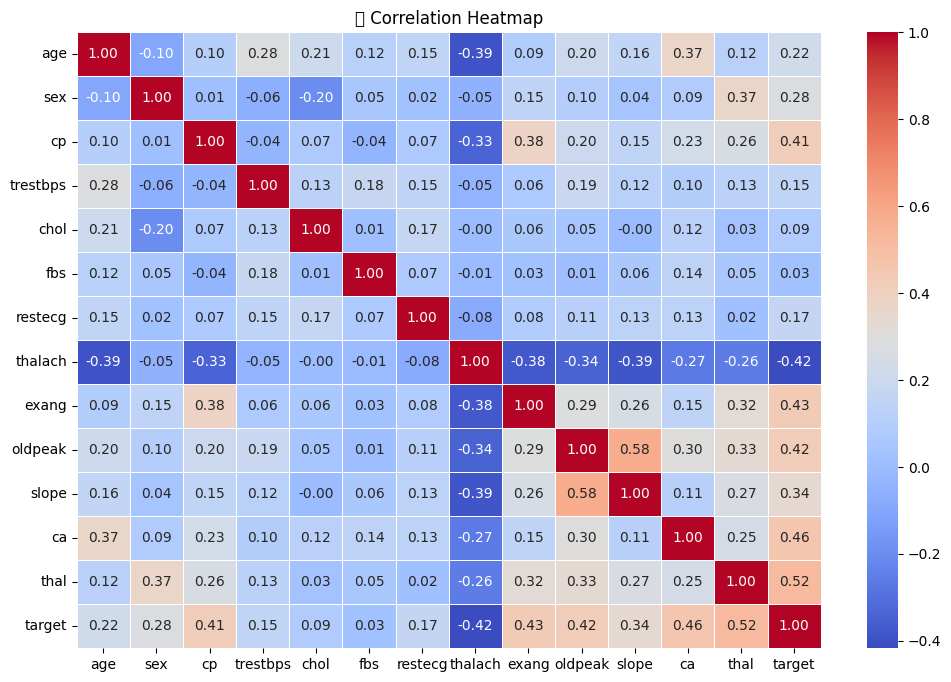


🎯 Model Accuracy: 88.52%

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


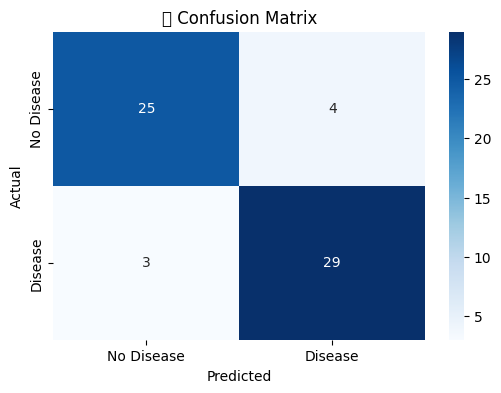

<ipython-input-9-cb6eca16ff49>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


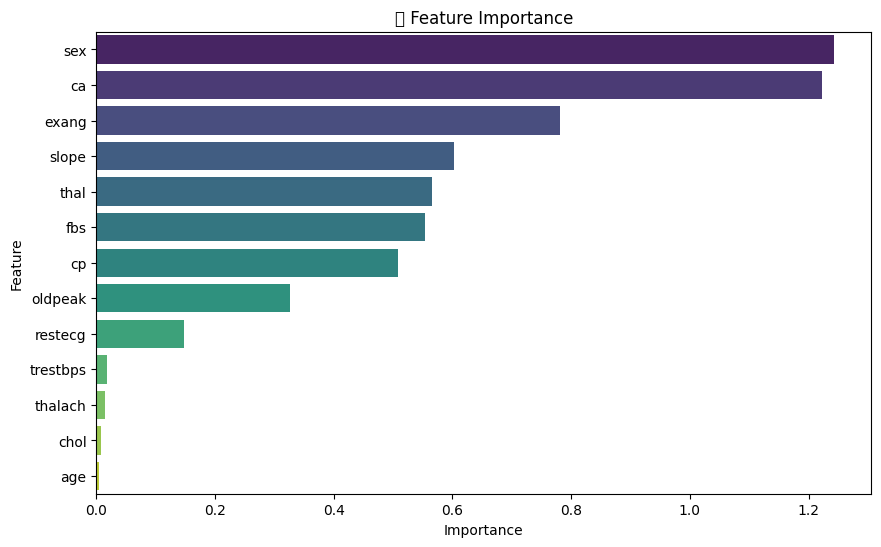

In [9]:
# Step 1: File Upload
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np

# Upload the file
uploaded = files.upload()

# Read the uploaded file
file_name = next(iter(uploaded))
if file_name.endswith('.xlsx'):
    df = pd.read_excel(file_name)
elif file_name.endswith('.csv'):
    df = pd.read_csv(file_name)
else:
    print("Unsupported file format. Please upload an Excel (.xlsx) or CSV file.")
    exit()

# Display basic info
print("✅ Dataset loaded successfully!")
print("Shape of the dataset:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# Step 2: Preprocessing
# Remove non-numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Handle missing values
if numeric_df.isnull().values.any():
    print("\n⚠️ Missing values detected. Handling missing values by dropping rows.")
    numeric_df = numeric_df.dropna()

# Step 3: Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("🔗 Correlation Heatmap")
plt.show()

# Step 4: Feature/Target Split
target_col = "target" if "target" in numeric_df.columns else numeric_df.columns[-1]
X = numeric_df.drop(target_col, axis=1)
y = numeric_df[target_col]

# Step 5: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 7: Predictions and Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n🎯 Model Accuracy: {accuracy * 100:.2f}%")
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

# Step 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title("📊 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 9: Feature Importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(model.coef_[0])
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')
plt.title("🔥 Feature Importance")
plt.show()
